In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [3]:
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

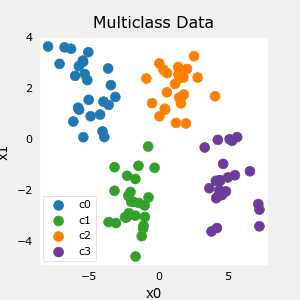

In [4]:
plt_mc(X_train,y_train,classes, centers, std=std)

In [5]:
# show classes in data set
print(f"unique classes {np.unique(y_train)}")
# show how classes are represented
print(f"class representation {y_train[:10]}")
# show shapes of our dataset
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

unique classes [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0]
shape of X_train: (100, 2), shape of y_train: (100,)


In [6]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        Dense(2, activation = 'relu',   name = "L1"),
        Dense(4, activation = 'linear', name = "L2")
    ]
)

In [7]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # train the data with z instead of a
    optimizer=tf.keras.optimizers.Adam(0.01),
)

In [8]:

model.fit(
    X_train,y_train,
    epochs=200
)

Epoch 1/200
4/4 [==============================] - 0s 478us/step - loss: 1.8136
Epoch 2/200
4/4 [==============================] - 0s 336us/step - loss: 1.7196
Epoch 3/200
4/4 [==============================] - 0s 343us/step - loss: 1.6421
Epoch 4/200
4/4 [==============================] - 0s 323us/step - loss: 1.5740
Epoch 5/200
4/4 [==============================] - 0s 339us/step - loss: 1.4514
Epoch 6/200
4/4 [==============================] - 0s 414us/step - loss: 1.4074
Epoch 7/200
4/4 [==============================] - 0s 400us/step - loss: 1.3158
Epoch 8/200
4/4 [==============================] - 0s 693us/step - loss: 1.2721
Epoch 9/200
4/4 [==============================] - 0s 733us/step - loss: 1.2249
Epoch 10/200
4/4 [==============================] - 0s 603us/step - loss: 1.2049
Epoch 11/200
4/4 [==============================] - 0s 410us/step - loss: 1.1549
Epoch 12/200
4/4 [==============================] - 0s 416us/step - loss: 1.1149
Epoch 13/200
4/4 [===================

2022-12-18 10:51:33.252881: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-12-18 10:51:33.255060: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


Epoch 24/200
4/4 [==============================] - 0s 854us/step - loss: 0.7547
Epoch 25/200
4/4 [==============================] - 0s 421us/step - loss: 0.6943
Epoch 26/200
4/4 [==============================] - 0s 410us/step - loss: 0.6844
Epoch 27/200
4/4 [==============================] - 0s 377us/step - loss: 0.6580
Epoch 28/200
4/4 [==============================] - 0s 357us/step - loss: 0.6339
Epoch 29/200
4/4 [==============================] - 0s 385us/step - loss: 0.6341
Epoch 30/200
4/4 [==============================] - 0s 425us/step - loss: 0.6004
Epoch 31/200
4/4 [==============================] - 0s 637us/step - loss: 0.6138
Epoch 32/200
4/4 [==============================] - 0s 394us/step - loss: 0.6106
Epoch 33/200
4/4 [==============================] - 0s 400us/step - loss: 0.5639
Epoch 34/200
4/4 [==============================] - 0s 351us/step - loss: 0.5440
Epoch 35/200
4/4 [==============================] - 0s 382us/step - loss: 0.5496
Epoch 36/200
4/4 [==========

4/4 [==============================] - 0s 445us/step - loss: 0.0962
Epoch 125/200
4/4 [==============================] - 0s 382us/step - loss: 0.0971
Epoch 126/200
4/4 [==============================] - 0s 455us/step - loss: 0.0930
Epoch 127/200
4/4 [==============================] - 0s 476us/step - loss: 0.0891
Epoch 128/200
4/4 [==============================] - 0s 353us/step - loss: 0.0928
Epoch 129/200
4/4 [==============================] - 0s 377us/step - loss: 0.0836
Epoch 130/200
4/4 [==============================] - 0s 392us/step - loss: 0.0862
Epoch 131/200
4/4 [==============================] - 0s 461us/step - loss: 0.0851
Epoch 132/200
4/4 [==============================] - 0s 383us/step - loss: 0.0782
Epoch 133/200
4/4 [==============================] - 0s 394us/step - loss: 0.0795
Epoch 134/200
4/4 [==============================] - 0s 457us/step - loss: 0.0803
Epoch 135/200
4/4 [==============================] - 0s 505us/step - loss: 0.0761
Epoch 136/200
4/4 [===========

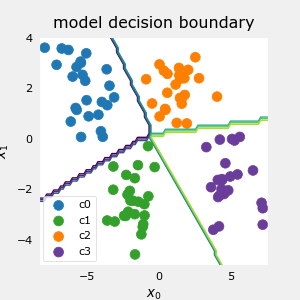

In [9]:
plt_cat_mc(X_train, y_train, model, classes)

In [10]:
# gather the trained parameters from the first layer
l1 = model.get_layer("L1")
W1,b1 = l1.get_weights()

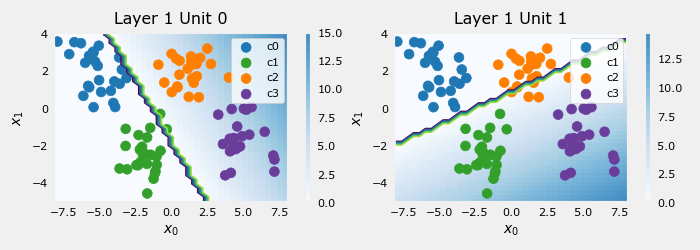

In [11]:
plt_layer_relu(X_train, y_train.reshape(-1,), W1, b1, classes)

In [12]:
# gather the trained parameters from the output layer
l2 = model.get_layer("L2")
W2, b2 = l2.get_weights()

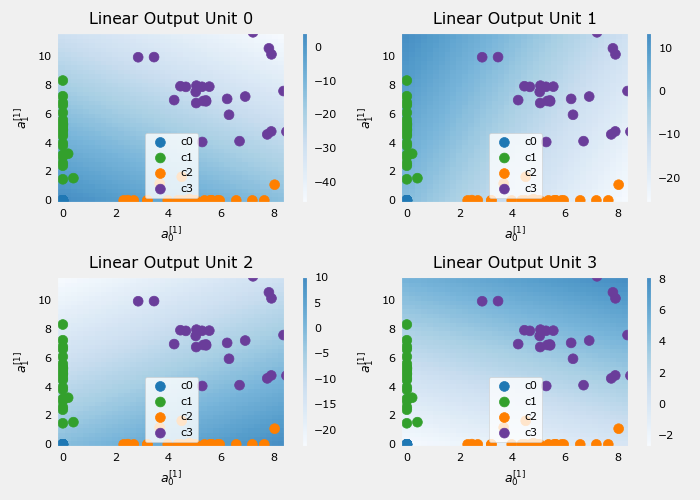

In [13]:
# create the 'new features', the training examples after L1 transformation
Xl2 = np.zeros_like(X_train)
Xl2 = np.maximum(0, np.dot(X_train,W1) + b1)

plt_output_layer_linear(Xl2, y_train.reshape(-1,), W2, b2, classes,
                        x0_rng = (-0.25,np.amax(Xl2[:,0])), x1_rng = (-0.25,np.amax(Xl2[:,1])))